In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
Krause_stocks <- read.csv("../41467_2025_59204_MOESM4_ESM/Supplementary Software/stocks.csv" , fileEncoding="latin1") |>
                 dplyr::rename(Article.ID = `ï..Article.ID`)
Krause_stocks_cols <- dput(colnames(Krause_stocks))

c("Article.ID", "Publication.year", "Study.site", "Country", 
"Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
"Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
"Seagrass.species", "Seagrass.genus", "Additional.identification", 
"Above.ground.biomass", "Below.ground.biomass", "Total.biomass", 
"Sampling.depth", "Ctot.stock", "Ctot.content", "Corg.stock", 
"Corg.content", "Cinorg.stock", "Cinorg.content", "Ctot.stock.15cm", 
"Corg.stock.15cm", "Cinorg.stock.15cm", "Ctot.stock.30cm", "Corg.stock.30cm", 
"Cinorg.stock.30cm", "Ctot.stock.50cm", "Corg.stock.50cm", "Cinorg.stock.50cm", 
"Ctot.stock.100cm", "Corg.stock.100cm", "Cinorg.stock.100cm", 
"OM.content", "Porosity", "Dry.Bulk.Density", "Grain.size", "Fraction.mud", 
"Notes")


In [3]:
Krause_data <- read.csv("../41467_2025_59204_MOESM4_ESM/Supplementary Software/Core_data.csv" , fileEncoding="latin1")
Krause_data_cols <- dput(colnames(Krause_data))

c("ï..Article.ID", "Primary.reference", "Secondary.reference", 
"Publication.year", "Site.name", "Country", "Latitude", "Longitude", 
"Species", "Core.ID", "Top.of.section", "Bottom.of.section", 
"Depth.at.center.of.slice", "Thickness.sediment.slice", "Dry.Bulk.Density", 
"OM.content", "OM.density", "Corg", "Cinorg", "Cinorg.stock.increment", 
"Corg.stock.increment", "Ctot.stock.increment", "DBD.core", "OM.content.core", 
"Corg.core", "Cinorg.core", "Cinorg.stock.core", "Corg.stock.core", 
"Ctot.stock.core", "Depth.of.core", "X", "X.1", "X.2")


In [4]:
Krause_database <- read_rds("../data/Krause_database.rds") |>
                   dplyr::mutate(data_source = "Krause_et_al_2025") |>
                   dplyr::relocate(data_source)
dim(Krause_database)

[1] 2813   48

In [5]:
Krause_database |> select(where(~ !all(is.na(.)))) |> dim()

[1] 2813   48

In [6]:
zaf_data_df <- read_rds("../data/zaf_data_df.rds") 
glimpse(zaf_data_df)

Rows: 573
Columns: 13
$ data_source             <chr> "Bossert_et_al_2024", "Bossert_et_al_2024", "B…
$ study_id                <chr> "Bossert_et_al_2024", "Bossert_et_al_2024", "B…
$ site_id                 <chr> "Berg", "Berg", "Berg", "Berg", "Berg", "Berg"…
$ core_id                 <chr> "LWR_SS1_R1", "LWR_SS1_R1", "LWR_SS1_R1", "LWR…
$ depth_min               <dbl> 0, 3, 6, 10, 0, 3, 6, 10, 0, 3, 6, 10, 0, 3, 6…
$ depth_max               <dbl> 3, 6, 10, 15, 3, 6, 10, 15, 3, 6, 10, 15, 3, 6…
$ dry_bulk_density        <dbl> 1.0301527, 1.0991792, 0.8814128, 1.1093583, 0.…
$ fraction_organic_matter <dbl> 0.40, 0.25, 0.97, 0.45, 0.34, 0.69, 0.30, 0.34…
$ year                    <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022…
$ latitude                <dbl> -32.7716, -32.7716, -32.7716, -32.7716, -32.77…
$ longitude               <dbl> 18.14287, 18.14287, 18.14287, 18.14287, 18.142…
$ species_code            <chr> "Zostera capensis", "Zostera capensis", "Zoste…
$ code_type       

In [7]:
dim(zaf_data_df)

[1] 573  13

In [8]:
zaf_data_df <- dplyr::filter(zaf_data_df, !is.na(dry_bulk_density)) |>
               dplyr::filter(!is.na(fraction_organic_matter))

In [9]:
dim(zaf_data_df)

[1] 406  13

In [10]:
unique(zaf_data_df$data_source)

[1] "Bossert_et_al_2024" "Ndhlovu_et_al"

In [11]:
#zaf_data_df

In [12]:
setdiff(names(zaf_data_df), names(Krause_stocks))

[1] "data_source"             "study_id"               
 [3] "site_id"                 "core_id"                
 [5] "depth_min"               "depth_max"              
 [7] "dry_bulk_density"        "fraction_organic_matter"
 [9] "year"                    "latitude"               
[11] "longitude"               "species_code"           
[13] "code_type"

In [13]:
(Zcapensis_depthseries <- dplyr::rename(rename(zaf_data_df, Article.ID = study_id),
                                               Study.site = site_id,
                                               Latitude = latitude,
                                               Longitude = longitude,
                                               Seagrass.species = species_code,
                                               Core.ID = core_id,
                                               Top.of.section = depth_min, 
                                               Bottom.of.section = depth_max,
                                               Dry.Bulk.Density = dry_bulk_density,
                                               Corg = fraction_organic_matter) |> 
                                 dplyr::mutate(Publication.year = str_split_fixed(Article.ID, "_", 4)[4],
                                     Seagrass.genus = str_split_fixed(Seagrass.species, " ", 2)[2],
                                     Country = "South Africa",
                                     Marine.ecoregion = "Temperate Southern Africa",
                                     Seagrass.bioregion = "Temperate Southern Oceans",
                                     Coastal.typology = "Type I: Small deltas",
                                     Seagrass.functionalmorphological.group = "Group B: Intermediate (Halodule, Zostera, Heterozostera, Syringodium, Cymodocea sp.)",
                                     Coastal.typology = if_else(Study.site == "Langebaan", "Type III: Lagoons", Coastal.typology)) |>
                         dplyr::relocate(any_of(Krause_stocks_cols), .before = everything())) |>
                         dplyr::select(where(is.numeric)) |>
                         dplyr::sample_n(5)

Latitude,Longitude,Dry.Bulk.Density,Top.of.section,Bottom.of.section,Corg,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-32.81825,18.19599,0.9543058,6,10,0.290,2022
25.62139,-33.86114,1.5124200,20,30,2.603,2021
23.05105,-34.05871,1.5530600,30,50,1.078,2021
-32.81825,18.19599,0.9705039,10,15,0.320,2022
-34.38955,20.75021,1.1777466,10,15,0.580,2022


In [14]:
dput(colnames(Zcapensis_depthseries))

c("Article.ID", "Publication.year", "Study.site", "Country", 
"Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
"Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
"Seagrass.species", "Seagrass.genus", "Dry.Bulk.Density", "data_source", 
"Core.ID", "Top.of.section", "Bottom.of.section", "Corg", "year", 
"code_type")


In [15]:
coredata_slices <-  Zcapensis_depthseries |>
                    dplyr::mutate(Thickness.sediment.slice = Bottom.of.section - Top.of.section,
                                  Depth.at.center.of.slice = Top.of.section + (Thickness.sediment.slice/2),
                                  depth_interval = Top.of.section + Thickness.sediment.slice,
                                  Corg_DBD = Dry.Bulk.Density * (Corg/100), 
                                  Carbon_density = Corg_DBD * Thickness.sediment.slice,
                                  Corg_DBD = Dry.Bulk.Density * (Corg/100), Corg_DBD_interval = Corg_DBD * Thickness.sediment.slice) |>
                    dplyr::group_by(across(all_of(c("Article.ID", "Study.site", "Country", "Latitude", "Longitude", "Seagrass.species", "Core.ID")))) |>
                    dplyr::mutate(cumsum_Corg_DBD = cumsum(Corg_DBD_interval),
                                  carbon_stock_MgC_ha = cumsum_Corg_DBD * (1/1000000) * (100000000/1)) |>
                        dplyr::ungroup() 

[1] 406  28

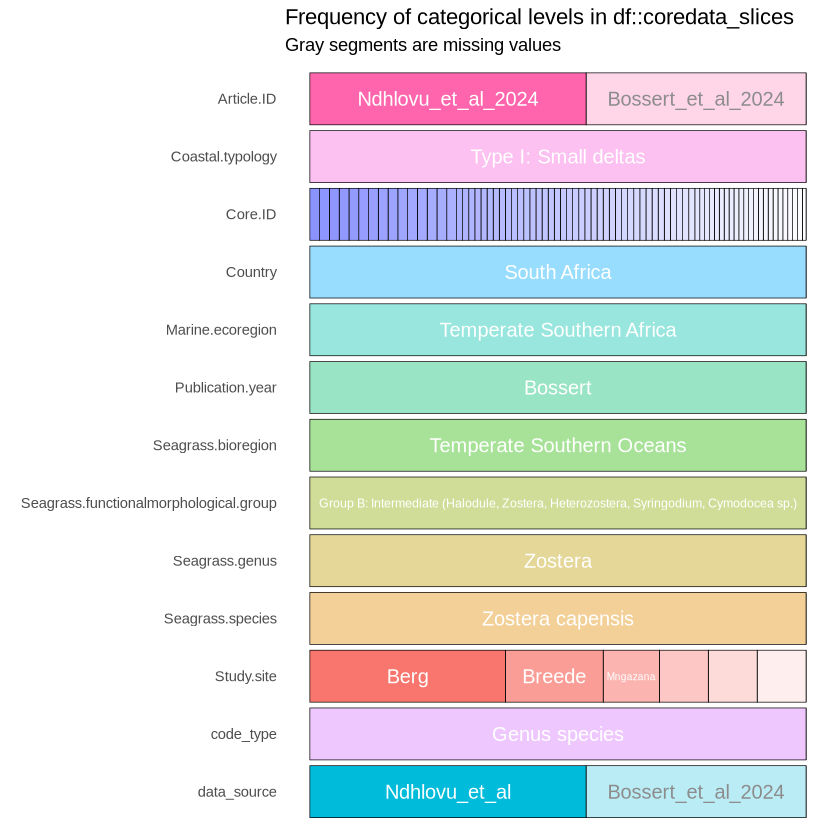

In [16]:
dim(coredata_slices)
inspectdf::inspect_cat(coredata_slices) |> inspectdf::show_plot()

In [17]:
glimpse(coredata_slices)

Rows: 406
Columns: 28
$ Article.ID                             <chr> "Bossert_et_al_2024", "Bossert_…
$ Publication.year                       <chr> "Bossert", "Bossert", "Bossert"…
$ Study.site                             <chr> "Berg", "Berg", "Berg", "Berg",…
$ Country                                <chr> "South Africa", "South Africa",…
$ Latitude                               <dbl> -32.7716, -32.7716, -32.7716, -…
$ Longitude                              <dbl> 18.14287, 18.14287, 18.14287, 1…
$ Coastal.typology                       <chr> "Type I: Small deltas", "Type I…
$ Marine.ecoregion                       <chr> "Temperate Southern Africa", "T…
$ Seagrass.bioregion                     <chr> "Temperate Southern Oceans", "T…
$ Seagrass.functionalmorphological.group <chr> "Group B: Intermediate (Halodul…
$ Seagrass.species                       <chr> "Zostera capensis", "Zostera ca…
$ Seagrass.genus                         <chr> "Zostera", "Zostera", "Zostera"…
$ Dry.Bulk.Density

In [18]:
xtabs(~ Study.site, data = coredata_slices)

Study.site
     Berg    Breede    Knysna  Mngazana  Olifants Swartkops 
      160        80        40        46        40        40 

In [19]:
interpolate_slice <- function(data, x_val) {
    
  # Return NA if x_val is NA
  if (is.na(x_val)) return(NA_real_)

  # Rename columns to standard names (assumes only two columns: x and y)
  clean_data <- data %>%
    setNames(c("x", "y")) %>%
    filter(!is.na(x) & !is.na(y))

  if (nrow(clean_data) == 0) return(NA_real_)

  if (x_val > max(clean_data$x, na.rm = TRUE)) {
    return(NA_real_)
  }

  model <- lm(y ~ x, data = clean_data)

  predict(model, newdata = data.frame(x = x_val))
}

In [20]:
colnames(coredata_slices)

[1] "Article.ID"                            
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "Dry.Bulk.Density"                      
[14] "data_source"                           
[15] "Core.ID"                               
[16] "Top.of.section"                        
[17] "Bottom.of.section"                     
[18] "Corg"                                  
[19] "year"                                  
[20] "code_type"                             
[21] "Thickness.sediment.slice"              
[22] "Depth.at.center.of.slice"              
[23] "depth_interval"                        
[24] "Corg_DBD"                              
[25] "Carbon_density"                        
[26] "Corg_DBD_interval"                     
[27] "cumsum_Corg_DBD"                       
[28] "carbon_stock_MgC_ha"

In [21]:
soc_vars <- c("Corg", "Dry.Bulk.Density")
soc_depths  <- c(15, 20, 30, 50, 100)         

In [22]:
# get_slice_val <- function(data, x_col, y_col, x_val) {
#   match_row <- data[data[[x_col]] == x_val, , drop = FALSE]
#   if (nrow(match_row) == 0) return(NA_real_)
#   return(match_row[[y_col]][1])
# }

In [23]:
get_slice_val <- function(data, x_val) {
    
      # Ensure input is a data.frame and has at least 2 columns
      if (!is.data.frame(data) || ncol(data) < 2) return(NA_real_)
      
      x_col <- names(data)[1]
      y_col <- names(data)[2]
      
      # If either column is missing, return NA
      if (is.null(x_col) || is.null(y_col)) return(NA_real_)
      
      # Defensive: ensure x_col has non-NA entries to check
      if (!x_col %in% names(data) || !y_col %in% names(data)) return(NA_real_)
      
      # Filter for exact match
      match_row <- data[data[[x_col]] == x_val, , drop = FALSE]
      
      # Return NA if no match
      if (nrow(match_row) == 0) return(NA_real_)
      
      return(match_row[[y_col]][1])
    
}

In [24]:
slice_check <- function(data, x_val, xreal) {
    
  if (isTRUE(x_val == xreal)) {
      return(get_slice_val(data, x_val))
  } else {
     return(NA_real_)
  }
}

In [25]:
grouping_cols <- c("Article.ID", "Study.site", "Country", "Latitude", "Longitude", "Seagrass.species", "Core.ID")

In [26]:
na_report_list <- list()

core_varx_depthx_list <- lapply(soc_vars, function(varx) {
  
    lapply(soc_depths, function(depthx) {

    var_name <- paste0(varx, "_", depthx)
    int_var_name <- paste0("int_", varx, "_", depthx)
    N_sample_count <-  paste0("stat_N_sample_", varx)
    n_count <-  paste0("stat_n_sample_", varx)

    df <- coredata_slices |>
          dplyr::group_by(across(all_of(grouping_cols))) |>
          dplyr::summarise(!!N_sample_count := sum(!is.na(.data[[varx]])),
                           !!n_count := n(),
                           Depth.of.core = max(Bottom.of.section),
                           !!var_name := get_slice_val(pick(depth_interval, all_of(varx)), x_val = depthx),
                           !!int_var_name := interpolate_slice(pick(depth_interval, all_of(varx)), x_val = depthx),
                           .groups = "drop") |>
          dplyr::ungroup() 

    return(df)
  })
})

In [27]:
core_varx_depthx_df <- Reduce(function(x, y)  merge(x, y), core_varx_depthx_list) |>  dplyr::select(-matches("\\.\\d+$"))

In [28]:
dim(core_varx_depthx_df)
colnames(core_varx_depthx_df)

[1] 92 32

[1] "Article.ID"                     "Study.site"                    
 [3] "Country"                        "Latitude"                      
 [5] "Longitude"                      "Seagrass.species"              
 [7] "Core.ID"                        "Depth.of.core"                 
 [9] "stat_N_sample_Corg"             "stat_n_sample_Corg"            
[11] "Corg_15"                        "int_Corg_15"                   
[13] "Corg_20"                        "int_Corg_20"                   
[15] "Corg_30"                        "int_Corg_30"                   
[17] "Corg_50"                        "int_Corg_50"                   
[19] "Corg_100"                       "int_Corg_100"                  
[21] "stat_N_sample_Dry.Bulk.Density" "stat_n_sample_Dry.Bulk.Density"
[23] "Dry.Bulk.Density_15"            "int_Dry.Bulk.Density_15"       
[25] "Dry.Bulk.Density_20"            "int_Dry.Bulk.Density_20"       
[27] "Dry.Bulk.Density_30"            "int_Dry.Bulk.Density_30"       
[29] "Dry.Bulk.Density_50"            "int_Dry.Bulk.Density_50"       
[31] "Dry.Bulk.Density_100"           "int_Dry.Bulk.Density_100"

In [29]:
dim(coredata_slices)
dput(colnames(coredata_slices))

[1] 406  28

c("Article.ID", "Publication.year", "Study.site", "Country", 
"Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
"Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
"Seagrass.species", "Seagrass.genus", "Dry.Bulk.Density", "data_source", 
"Core.ID", "Top.of.section", "Bottom.of.section", "Corg", "year", 
"code_type", "Thickness.sediment.slice", "Depth.at.center.of.slice", 
"depth_interval", "Corg_DBD", "Carbon_density", "Corg_DBD_interval", 
"cumsum_Corg_DBD", "carbon_stock_MgC_ha")


In [30]:
get_nearest <- function (data, depth) {
    
    Bottom.of.section <- data["Bottom.of.section"]  
    if (depth > max(Bottom.of.section)) {
        nearest_depth = NA
    }
    else{ 
         return(max(Bottom.of.section[Bottom.of.section <=  depth], na.rm = TRUE))
        }
}

In [38]:
coredata_cores <- coredata_slices |>
                  dplyr::group_by(across(all_of(c("Article.ID", "Study.site", "Country", "Latitude", "Longitude", "Seagrass.species", "Core.ID")))) |>
                  dplyr::summarise(d15 = get_nearest(cur_data(),  15), cumsum_Corg_DBD_n15 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d15),
                                 d20 = get_nearest(cur_data(),  20), cumsum_Corg_DBD_n20 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d20),
                                 d30 = get_nearest(cur_data(),  30), cumsum_Corg_DBD_n30 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d30),
                                 d50 = get_nearest(cur_data(),  50), cumsum_Corg_DBD_n50 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d50),
                                 d100 = get_nearest(cur_data(), 100), cumsum_Corg_DBD_n100 = get_slice_val(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = d100),
                                 Corg.stock.15cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 15),
                                 Corg.stock.20cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 20),
                                 Corg.stock.30cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 30),
                                 Corg.stock.50cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 50),
                                 Corg.stock.100cm = get_slice_val(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = 100))

`summarise()` has grouped output by 'Article.ID', 'Study.site', 'Country', 'Latitude', 'Longitude', 'Seagrass.species'. You can override using the `.groups` argument.


In [40]:
core_varx_Corg <- merge(core_varx_depthx_df, coredata_cores) |>        
                  dplyr::mutate(
                    # Depth 15
                    Corg_15 = coalesce(Corg_15, int_Corg_15),
                    Dry.Bulk.Density_15 = coalesce(Dry.Bulk.Density_15, int_Dry.Bulk.Density_15),
                    depth_diff15 = 15 - d15,
                    Carbon_density_15 = if_else(
                      depth_diff15 != 0,
                      Dry.Bulk.Density_15 * (Corg_15 / 100) * depth_diff15,
                      NA_real_
                    ),
                    Corg.stock.15cm = if_else(
                      is.na(Corg.stock.15cm),
                      (cumsum_Corg_DBD_n15 + Carbon_density_15) * 100,
                      Corg.stock.15cm
                    ),
                
                    # Depth 20
                    Corg_20 = coalesce(Corg_20, int_Corg_20),
                    Dry.Bulk.Density_20 = coalesce(Dry.Bulk.Density_20, int_Dry.Bulk.Density_20),
                    depth_diff20 = 20 - d20,
                    Carbon_density_20 = if_else(
                      depth_diff20 != 0,
                      Dry.Bulk.Density_20 * (Corg_20 / 100) * depth_diff20,
                      NA_real_
                    ),
                    Corg.stock.20cm = if_else(
                      is.na(Corg.stock.20cm),
                      (cumsum_Corg_DBD_n20 + Carbon_density_20) * 100,
                      Corg.stock.20cm
                    ),
                
                    # Depth 30
                    Corg_30 = coalesce(Corg_30, int_Corg_30),
                    Dry.Bulk.Density_30 = coalesce(Dry.Bulk.Density_30, int_Dry.Bulk.Density_30),
                    depth_diff30 = 30 - d30,
                    Carbon_density_30 = if_else(
                      depth_diff30 != 0,
                      Dry.Bulk.Density_30 * (Corg_30 / 100) * depth_diff30,
                      NA_real_
                    ),
                    Corg.stock.30cm = if_else(
                      is.na(Corg.stock.30cm),
                      (cumsum_Corg_DBD_n30 + Carbon_density_30) * 100,
                      Corg.stock.30cm
                    ),
                
                    # Depth 50
                    Corg_50 = coalesce(Corg_50, int_Corg_50),
                    Dry.Bulk.Density_50 = coalesce(Dry.Bulk.Density_50, int_Dry.Bulk.Density_50),
                    depth_diff50 = 50 - d50,
                    Carbon_density_50 = if_else(
                      depth_diff50 != 0,
                      Dry.Bulk.Density_50 * (Corg_50 / 100) * depth_diff50,
                      NA_real_
                    ),
                    Corg.stock.50cm = if_else(
                      is.na(Corg.stock.50cm),
                      (cumsum_Corg_DBD_n50 + Carbon_density_50) * 100,
                      Corg.stock.50cm
                    ),
                
                    # Depth 100
                    Corg_100 = coalesce(Corg_100, int_Corg_100),
                    Dry.Bulk.Density_100 = coalesce(Dry.Bulk.Density_100, int_Dry.Bulk.Density_100),
                    depth_diff100 = 100 - d100,
                    Carbon_density_100 = if_else(
                      depth_diff100 != 0,
                      Dry.Bulk.Density_100 * (Corg_100 / 100) * depth_diff100,
                      NA_real_
                    ),
                    Corg.stock.100cm = if_else(
                      is.na(Corg.stock.100cm),
                      (cumsum_Corg_DBD_n100 + Carbon_density_100) * 100,
                      Corg.stock.100cm
                    )
                  )


In [42]:
dim(core_varx_Corg)

[1] 92 57

In [43]:
colnames(core_varx_Corg)

[1] "Article.ID"                     "Study.site"                    
 [3] "Country"                        "Latitude"                      
 [5] "Longitude"                      "Seagrass.species"              
 [7] "Core.ID"                        "Depth.of.core"                 
 [9] "stat_N_sample_Corg"             "stat_n_sample_Corg"            
[11] "Corg_15"                        "int_Corg_15"                   
[13] "Corg_20"                        "int_Corg_20"                   
[15] "Corg_30"                        "int_Corg_30"                   
[17] "Corg_50"                        "int_Corg_50"                   
[19] "Corg_100"                       "int_Corg_100"                  
[21] "stat_N_sample_Dry.Bulk.Density" "stat_n_sample_Dry.Bulk.Density"
[23] "Dry.Bulk.Density_15"            "int_Dry.Bulk.Density_15"       
[25] "Dry.Bulk.Density_20"            "int_Dry.Bulk.Density_20"       
[27] "Dry.Bulk.Density_30"            "int_Dry.Bulk.Density_30"       
[29] "Dry.Bulk.Density_50"            "int_Dry.Bulk.Density_50"       
[31] "Dry.Bulk.Density_100"           "int_Dry.Bulk.Density_100"      
[33] "d15"                            "cumsum_Corg_DBD_n15"           
[35] "d20"                            "cumsum_Corg_DBD_n20"           
[37] "d30"                            "cumsum_Corg_DBD_n30"           
[39] "d50"                            "cumsum_Corg_DBD_n50"           
[41] "d100"                           "cumsum_Corg_DBD_n100"          
[43] "Corg.stock.15cm"                "Corg.stock.20cm"               
[45] "Corg.stock.30cm"                "Corg.stock.50cm"               
[47] "Corg.stock.100cm"               "depth_diff15"                  
[49] "Carbon_density_15"              "depth_diff20"                  
[51] "Carbon_density_20"              "depth_diff30"                  
[53] "Carbon_density_30"              "depth_diff50"                  
[55] "Carbon_density_50"              "depth_diff100"                 
[57] "Carbon_density_100"

In [ ]:
core_varx_Corg |>
dplyr::